# L5 - Hypothesis Simulation 

## Author - ZhuoyuPeng



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy.random as nr
import scipy.stats as ss
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.integrate import quad
import scipy
%matplotlib inline

In [3]:
#read data
df = pd.read_csv(fileName)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
df.shape

(205, 26)

### 1. Identify a likely distribution for price and several other features. For example, you should determine if the price is better represented by the log of price.

#### Let's study the distribution of price first.

In [7]:
#using to_numeric to convert dtype to numberic type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#if they are missing values, remove the missing values of
df.dropna(inplace=True)

#create log price
df['log price'] = np.log(df['price'])

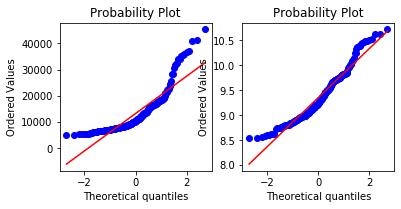

In [8]:
def qq_plot(vec1, vec2):
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    
qq_plot(df['price'],df['log price'])

Q-Q plots for price(left) and log price(right) are shown above. By eyes, log price is more straight than price, suggesting that log price could be more approaching normal than price.


We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

In [9]:
#standardize both price and log price
n_p = scale(df['price'])
n_lp = scale(df['log price'])

In [10]:
def ks_test(dat, name, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic for '+ name + ' = ' + str(ks_statisic))
    print('P-value for ' + name + '= ' + str(pvalue))
    
ks_test(n_p, 'price')    

KS-statistic for price = 0.1542761480184771
P-value for price= 0.00012108611006800808


In [11]:
ks_test(n_lp, 'log price')   

KS-statistic for log price = 0.09781904713791056
P-value for log price= 0.03984598613097214


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases. If we set threshold alpha smaller, like 1%. In this case, we cannot reject the hypothesis for log price, suggesting that log price has no difference to normal distribution. Thus, log price can be better represented as a normal distribution.

#### Then study the distribution of length.

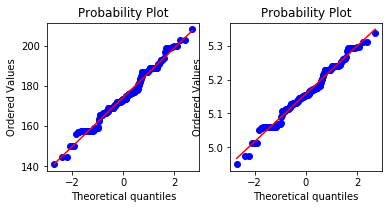

In [12]:
df['log length'] = np.log(df['length'])
qq_plot(df['length'],df['log length'])

In [13]:
n_l = scale(df['length'])
n_ll = scale(df['log length'])

print(ks_test(n_l, 'n_l'))
print(ks_test(n_ll, 'n_ll'))

KS-statistic for n_l = 0.09130336434771913
P-value for n_l= 0.06577245634398986
None
KS-statistic for n_ll = 0.0790959271014664
P-value for n_ll= 0.15330086864442666
None


Based on the statitics, both p-values are greater than the classic 0.05 threshold, suggesting we cannot reject the null hypothesis in both cases. If we set threshold alpha larger, like 10%. In this case, we cannot reject the hypothesis for log length, suggesting that log length still has no difference to normal distribution. In this case, log length is more likely to be similar to normal distribution.

#### Then study the distribution of width.

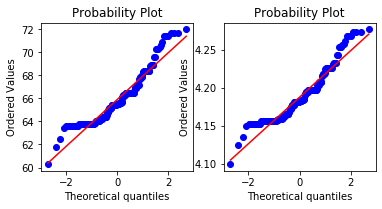

In [14]:
df['log width'] = np.log(df['width'])
qq_plot(df['width'],df['log width'])

In [15]:
n_w = scale(df['width'])
n_lw = scale(df['log width'])

print(ks_test(n_w, 'n_w'))
print(ks_test(n_lw, 'n_lw'))

KS-statistic for n_w = 0.13162278069313804
P-value for n_w= 0.0016971750865950022
None
KS-statistic for n_lw = 0.12470549875698722
P-value for n_lw= 0.003493500118777147
None


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases. If we set threshold alpha smaller, like 2%. In this case, we cannot reject the hypothesis for log width, suggesting that log width has no difference to normal distribution. Thus, log width can be better represented as a normal distribution.

#### Then study the distribution of height

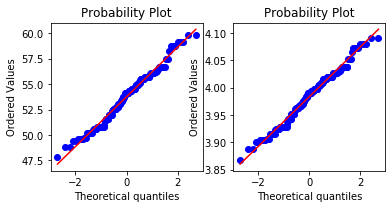

In [16]:
df['log height'] = np.log(df['height'])
qq_plot(df['height'],df['log height'])

In [17]:
n_h = scale(df['height'])
n_lh = scale(df['log height'])

print(ks_test(n_h, 'n_h'))
print(ks_test(n_lh, 'n_lh'))

KS-statistic for n_h = 0.07686935591018687
P-value for n_h= 0.1765704740671308
None
KS-statistic for n_lh = 0.0853984386075139
P-value for n_lh= 0.10054588434085347
None


Based on the statitics, both p-values are greater than the classic 0.05 threshold, suggesting we cannot reject the null hypothesis in both cases. If we set threshold alpha larger, like 15%. In this case, we cannot reject the hypothesis for height, suggesting that height still has no difference to normal distribution. In this case, height is more likely to be similar to normal distribution.

#### Then study the distribution of curb-weight

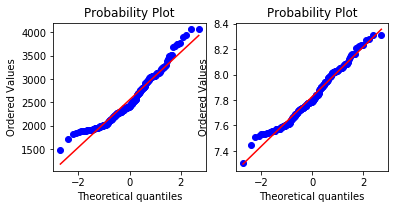

In [18]:
df['log c-w'] = np.log(df['curb-weight'])
qq_plot(df['curb-weight'],df['log c-w'])

In [19]:
n_cw = scale(df['curb-weight'])
n_lcw = scale(df['log c-w'])

print(ks_test(n_cw, 'n_cw'))
print(ks_test(n_lcw, 'n_lcw'))

KS-statistic for n_cw = 0.11239098195595931
P-value for n_cw= 0.011462332468530725
None
KS-statistic for n_lcw = 0.0793099857585301
P-value for n_lcw= 0.15120021366811584
None


Based on the statitics, p-value for log_curb-weight is higher than 0.05, suggesting we cannot reject the null hypothesis in this case. So, log_curb-weight is more likely to be similar to normal distribution.

#### Then study the distribution of horsepower

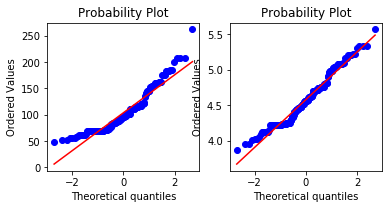

In [20]:
#using to_numeric to convert dtype to numberic type
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

#if they are missing values, remove the missing values of
df.dropna(inplace=True)

#create log horsepower
df['log hp'] = np.log(df['horsepower'])
qq_plot(df['horsepower'],df['log hp'])

In [21]:
n_hp = scale(df['horsepower'])
n_lhp = scale(df['log hp'])

print(ks_test(n_hp, 'n_hp'))
print(ks_test(n_lhp, 'n_lhp'))

KS-statistic for n_hp = 0.12706164818524857
P-value for n_hp= 0.0029277197815358812
None
KS-statistic for n_lhp = 0.10331376349242288
P-value for n_lhp= 0.026531353001075612
None


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases. If we set threshold alpha smaller, like 2%. In this case, we cannot reject the hypothesis for log horsepower, suggesting that log horsepower has no difference to normal distribution. Thus, log horsepower can be better represented as a normal distribution.

### 2. Compute basic summary statistic of the mean by both classical bootstrap and Bayesian methods

##### Let's do bootstrp mean.
Height is choosen to perform the analysis

In [22]:
# boostrap sample
bstrap = df.sample(frac = 1, replace=True)
#calculate the mean of boostrap sample
h = bstrap['log height'].mean()
bstrap_sum = pd.DataFrame({ 'height mean':[h]})
bstrap_sum.round(2)

,height mean
0,3.98


Height mean is estimated usign Boostrap method, to be 3.99

##### Compute the mean using Bayesian method.
To perform this analysis, we need to select a prior distribution and compute the likelihood. First, we will address the likelihood.

For features I selected, height. I will use Normal likelihood, that means my prior probability would be normal as well.

##### Mean for height in Bayesian method

In [23]:
N = 1000
p = np.linspace(3.9, 4.1, num=N)

pp = ss.norm.pdf(p, loc=df['log height'].mean(), scale=1)
pp = pp / pp.sum() # normalize

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
#     print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_height = comp_like(p, df['log height'])
post_height= posterior(pp, like_height)

## plotting the prior, likelihood and posterior distribution
# plt.plot(p, pp, label='prior')
# plt.plot(p, like_height, label='likelihood', alpha=.3, linewidth=10)
# plt.plot(p, post_height, label='posterior')
# plt.title('Height')
# plt.legend();

Becaues height is a discrete random varibale, expectecd  value can be calculated by sum (x*p(X=x)). So the mean of the posterior distribution can be calcualted as below.

In [24]:
bayesian_mean = sum(post_height * p)
print('Mean for posterior distribution = %.2f' % (bayesian_mean))

Mean for posterior distribution = 3.98


In the log height feature, mean estimated using boostrapping is 3.99, while mean estimated using bayesian is 3.98. They are close to each other. 

### 3.Compute confidence intervals for the summary statistics by classical bootstrap and Bayesian methods

In [25]:
#define a function to compute condifence intervals at 95% confidence interval
def ci(x, name):
    p = 5
    lower = np.percentile(x, p/2.)
    upper = np.percentile(x, 100-p/2.)
    print("Confidence interval for %s. is %.2f and %.2f" % (name, lower, upper))

In [26]:
#compute the confidence interval 
ci(bstrap['log height'], 'log height')

Confidence interval for log height. is 3.90 and 4.07


In [27]:

ci(df['log height'], 'log height')

Confidence interval for log height. is 3.90 and 4.07


Using the classical boostrapping method, the confidence interval for log height is 3.90 to 4.07, while in the Bayesian method, the confidence interval for log height is 3.90 to 4.07. They are similar to each other. 

### 4.Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are statistically significant. You will continue the analysis that you started in Assignment 04. For each of the groupings you analyzed in Assignment 04, apply the following methods:
### 1. Bootstrap methods
### 2. Bayesian model

#### First, do the pairs study first

#### Boostrap method Price vs Aspiration 

In [28]:
#create new dataframes for gas and diesel
std =pd.DataFrame()
turbo = pd.DataFrame()
print ( 'total std smaples:' ,sum(bstrap['aspiration'] == 'std'))
print('total samples:' ,bstrap.shape[0])

total std smaples: 166
total samples: 199


Check the sample size for each aspiration, and found that this is an unbalance sample size problem. Solution to this unbalance problem is get the same group size. (Similar to fuel type problem)

First, I need to boostrap samples, then I need to randomly pick 36 samples from std use Bernoulli sampling.

In [29]:
# from boostrap sample take out aspiration and log price
std['std price']=bstrap[bstrap['aspiration'] == 'std']['log price']
turbo['turbo price']=bstrap[bstrap['aspiration'] == 'turbo']['log price']

#  Bernoulli sampling
p = 0.1
std_36= std.iloc[nr.choice(range(162), size = int(p * 360)), :]

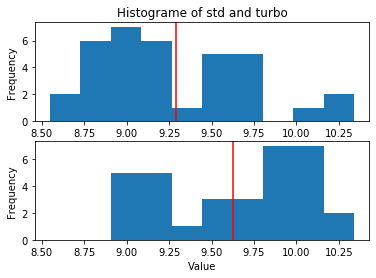

In [30]:
def hist_plot(vec, bins):
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
#     print(mean(vec))
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['std', 'turbo'], nbins = 10):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(std_36['std price'], turbo['turbo price']) 

In [31]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, 
                                  alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 
             'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1],
                      confint[0], confint[1]], index = index)   
   
aspiration = t_test(std_36['std price'], turbo['turbo price'],0.05) 
aspiration

DegFreedom    66.659313
Difference    -0.333146
Statistic     -3.015979
PValue         0.003623
Low95CI       -0.553646
High95CI      -0.112645
dtype: float64

From stats (Boostrap method for price vs aspiration):

Difference in means is large.

The t-statistic is small and the p-value is small(alpha = 0.05). Therefore, there is a low chance that the difference in means is from random variation alone. Based on these statistics we can reject the null hypothesis that price for std car is different from turbo car.

#### Bayesian method for Price vs Aspiration

In [32]:
#create std and turbo data frame with log price
s =pd.DataFrame()
t = pd.DataFrame()
s['std price']=df[df['aspiration'] == 'std']['log price']
t['turbo price']=df[df['aspiration'] == 'turbo']['log price']

#  Bernoulli sampling, solve unbalanced sample problem
p = 0.1
s_36= s.iloc[nr.choice(range(162), size = int(p * 360)), :]

In [33]:
#create a posterior distribution for std
N = 10000
p = np.linspace(8, 10, num=N)

pp = ss.norm.pdf(p, loc=s_36.mean(), scale=1)
pp = pp / pp.sum() # normalize

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
#     print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_std = comp_like(p, s_36['std price'])
post_std= posterior(pp, like_std)

# plotting the prior, likelihood and posterior distribution
# plt.plot(p, pp, label='prior')
# plt.plot(p, like_std, label='likelihood', alpha=.3, linewidth=10)
# plt.plot(p, post_std, label='posterior')
# plt.title('Height')
# plt.legend();

In [34]:
#create a posterior distribution for turbo
pp = ss.norm.pdf(p, loc=t.mean(), scale=1)
pp = pp / pp.sum() # normalize

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_turbo = comp_like(p, t['turbo price'])
post_turbo= posterior(pp, like_turbo)

# # plotting the prior, likelihood and posterior distribution
# plt.plot(p, pp, label='prior')
# plt.plot(p, like_height, label='likelihood', alpha=.3, linewidth=10)
# plt.plot(p, post_turbo, label='posterior')
# plt.title('Height')
# plt.legend();

Mean = 9.626, Standard deviation = 0.378


In [35]:
#get the mean distribution of two categories
p_std = post_std.sum()
p_tur = post_turbo.sum()
print("Mean for std %.2f and turbo %.2f using Bayesian method"%(p_std, p_tur))
#perform t-test
# aspiration_bay = t_test(p_std, p_tur,0.05) 
# aspiration_bay

Mean for std 1.00 and turbo 1.00 using Bayesian method


From stats (Bayesian method for price vs aspiration):
The means are std and turbo are the same. 

To further study two posterior distribution, I calculate the credible interval of two.

First, plot the CI for price of std

The 0.950 credible interval is 9.087 to 9.436


C:\Users\zhuoy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  


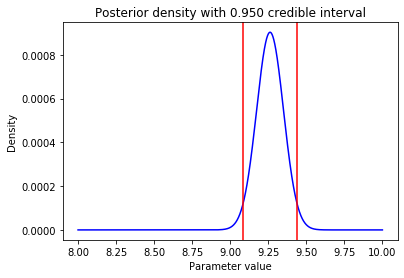

In [36]:
def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    from matplotlib import pyplot
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, ci[0], ci[1]))
    
plot_ci(p, post_std, N, lower_q=.025, upper_q=.975)

Plot the CI for price of turbo.

The 0.950 credible interval is 9.504 to 9.746


C:\Users\zhuoy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  


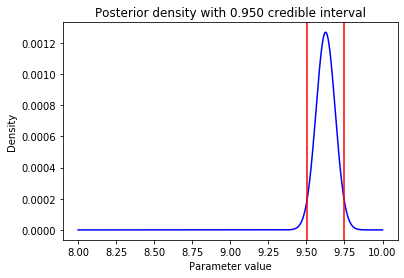

In [37]:
plot_ci(p, post_turbo, N, lower_q=.025, upper_q=.975)

From the above credible interval comparsion, CIs do not overlap, that means price for std is different than price for turbo, agree with the analysis using Boostrapping method.

## Summary for pairs comparison:
Both boostrap and Bayesian methods, price for turbo is different from price for std, agree with L4 classical analysis.

### Multipopulation

#### Boostrap for Body-style analysis

In [38]:
conv = pd.DataFrame()
hat = pd.DataFrame()
sed = pd.DataFrame()
wag = pd.DataFrame()
hard = pd.DataFrame()

conv['conv price']=bstrap[bstrap['body-style'] == 'convertible']['log price']
hat['hat price']=bstrap[bstrap['body-style'] == 'hatchback']['log price']
sed['sed price']=bstrap[bstrap['body-style'] == 'sedan']['log price']
wag['wag price']=bstrap[bstrap['body-style'] == 'wagon']['log price']
hard['hard price']=bstrap[bstrap['body-style'] == 'hardtop']['log price']

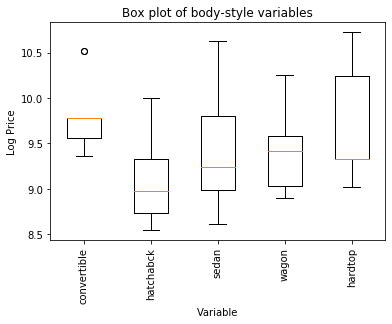

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([conv['conv price'], hat['hat price'], 
             sed['sed price'], wag['wag price'], hard['hard price']])
plt.ylabel('Log Price')
ax.set_xticklabels(['convertible', 'hatchabck','sedan','wagon', 'hardtop'], rotation = 'vertical')
plt.xlabel('Variable')
plt.title('Box plot of body-style variables');

In [40]:
f_statistic, p_value = ss.f_oneway(conv['conv price'], hat['hat price'],
                                   sed['sed price'], wag['wag price'], 
                                   hard['hard price'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 8.899881023936608
P-value = 1.281693113713407e-06


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 5 variables have the same mean, as the probability of the differences arising from random chance is quite low.

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df2 = pd.DataFrame({'vals' :conv['conv price'].tolist() + 
                    hat['hat price'].tolist() +
                   sed['sed price'].tolist() +wag['wag price'].tolist() +
                    hard['hard price'].tolist(),
                   'group_num': ['conv'] * len(conv) + ['hat'] * len(hat) + 
                    ['sed'] * len(sed) +
                   ['wag'] * len(wag) + ['hard'] *len(hard) })
Tukey_HSD = pairwise_tukeyhsd(df2.vals, df2.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  conv   hard  -0.0978    0.9 -0.8143  0.6187  False
  conv    hat  -0.7338  0.001 -1.1796  -0.288   True
  conv    sed  -0.3832 0.1095 -0.8158  0.0494  False
  conv    wag  -0.4413 0.1574 -0.9754  0.0927  False
  hard    hat   -0.636 0.0355 -1.2442 -0.0278   True
  hard    sed  -0.2854 0.6608  -0.884  0.3131  False
  hard    wag  -0.3436 0.6115 -1.0191   0.332  False
   hat    sed   0.3506  0.001  0.1418  0.5594   True
   hat    wag   0.2924 0.2078  -0.084  0.6689  False
   sed    wag  -0.0582    0.9 -0.4188  0.3025  False
----------------------------------------------------


From the table, we can see whether there is significant difference based on p-values and the reject column. "True" means we
reject the null hypoehtisis, there is a difference.

Next, we need to use Bayesian method to compare multipopulations.

In [42]:
#create std and turbo data frame with log price
conv = pd.DataFrame()
hat = pd.DataFrame()
sed = pd.DataFrame()
wag = pd.DataFrame()
hard = pd.DataFrame()



conv['conv price']=df[df['body-style'] == 'convertible']['log price']
hat['hat price']=df[df['body-style'] == 'hatchback']['log price']
sed['sed price']=df[df['body-style'] == 'sedan']['log price']
wag['wag price']=df[df['body-style'] == 'wagon']['log price']
hard['hard price']=df[df['body-style'] == 'hardtop']['log price']

In [43]:
#create a posterior distribution for conv
N = 10000
p = np.linspace(8, 12, num=N)

pp = ss.norm.pdf(p, loc=conv.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_conv = comp_like(p, conv['conv price'])
post_conv= posterior(pp, like_conv)

Mean = 9.891, Standard deviation = 0.447


Create a posterior distribution for hat

In [44]:
pp = ss.norm.pdf(p, loc=hat.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_hat = comp_like(p, hat['hat price'])
post_hat= posterior(pp, like_hat)

Mean = 9.127, Standard deviation = 0.392


Create a posterior distribution for sed

In [45]:
pp = ss.norm.pdf(p, loc=sed.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_sed = comp_like(p, sed['sed price'])
post_sed = posterior(pp, like_sed)

Mean = 9.439, Standard deviation = 0.510


Create a posterior distribution for wag

In [46]:
pp = ss.norm.pdf(p, loc=wag.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_wag = comp_like(p, wag['wag price'])
post_wag= posterior(pp, like_wag)

Mean = 9.360, Standard deviation = 0.378


Create a posterior distribution for hard

In [47]:
pp = ss.norm.pdf(p, loc=hard.mean(), scale=1)
pp = pp / pp.sum() # normalize

like_hard = comp_like(p, hard['hard price'])
post_hard = posterior(pp, like_hard)

Mean = 9.794, Standard deviation = 0.672


In [48]:
#get the mean distribution of five categories
p_conv = post_conv.sum()
p_hat = post_hat.sum()
p_sed = post_sed.sum()
p_wag = post_wag.sum()
p_hard = post_hard.sum()
print("Mean for conv %.2f, hat %.2f, sed %.2f, wag %.2f and hard %.2f using Bayesian method"
      %(p_conv, p_hat, p_sed, p_wag, p_hard))

Mean for conv 1.00, hat 1.00, sed 1.00, wag 1.00 and hard 1.00 using Bayesian method


Means for five categoreis are the same with 2 decimal places. So I plot CIs for further analysis.

The 0.950 credible interval is 9.537 to 10.244


C:\Users\zhuoy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  


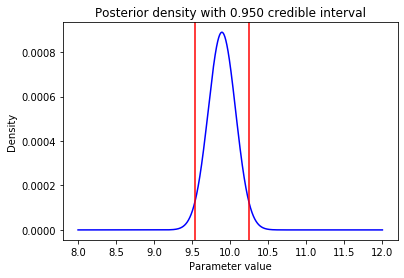

In [49]:
plot_ci(p, post_conv, N, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 9.031 to 9.221


C:\Users\zhuoy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  


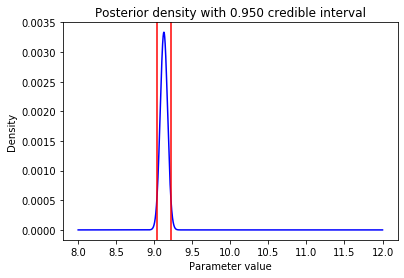

In [50]:
plot_ci(p, post_hat, N, lower_q=.025, upper_q=.975)

C:\Users\zhuoy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  


The 0.950 credible interval is 9.336 to 9.541


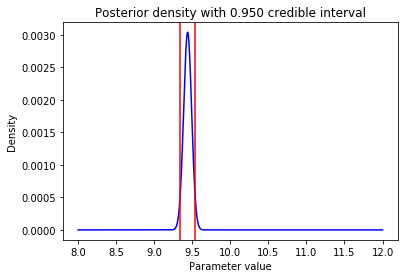

In [51]:
plot_ci(p, post_sed, N, lower_q=.025, upper_q=.975)

C:\Users\zhuoy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  


The 0.950 credible interval is 9.205 to 9.510


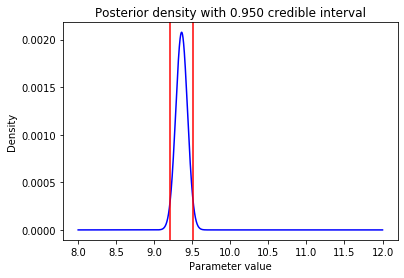

In [52]:
plot_ci(p, post_wag, N, lower_q=.025, upper_q=.975)

C:\Users\zhuoy\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  


The 0.950 credible interval is 9.345 to 10.243


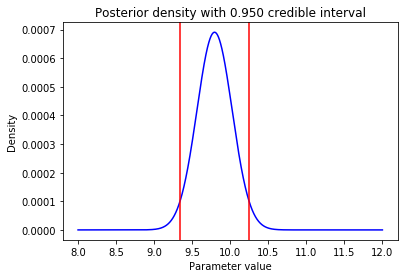

In [53]:
plot_ci(p, post_hard, N, lower_q=.025, upper_q=.975)

### Summary for multipopulation Bayesian method
conv:The 0.950 credible interval is 9.537 to 10.244

hat:The 0.950 credible interval is  9.031 to 9.221

sed:The 0.950 credible interval is  9.336 to 9.541

wag:The 0.950 credible interval is 9.205 to 9.510

hard:The 0.950 credible interval is 9.345 to 10.243

##### If CIs overlap, implying that there is no significant difference between two categories, vice versa.

conv and hat: not overlap, difference 

conv and sed: overlap, no difference

conv and wag: not overlap, difference

conv and hard: overlap, no difference

hat and sed: not overlap, difference

hat and wag:  overlap, no difference

hat and hard: no overlap, difference

sed and wag:overlap, no difference

sed and hard:ovelap, no difference

wag and hard:overlap, no difference

Compared with the boostrapping method, the analysis is almost the same, except conv and sed. Their CIs have a little bit overlay, which could be errorous based on this small overlap.

## Summary for multipopulation comparisons
1. boostrap analysis is the same as Bayesian analysis, except conv and sed, which chould be due to uncertainty of small overlap of CIs.
2. classical analysis (L4) agree with boostrapping analysis.
3. classical analysis (L4) agree with Bayesian analysis, except paris conv and sed. This is also due to the small overlap of CIs in Bayesian method for conv and sed.
